# Desafio 1 - How Bootcamp

## Construção de um pipeline simples de dados

### Passos Necessários:
1. Gerar dados com o Python Faker (json ou csv)
2. Criar uma conta AWS
3. Armazenar os dados em um Bucket do AWS S3
4. Fazer um Crawler dos dados com o AWS Glue
5. Criar três consultas dos dados com o AWS Athena


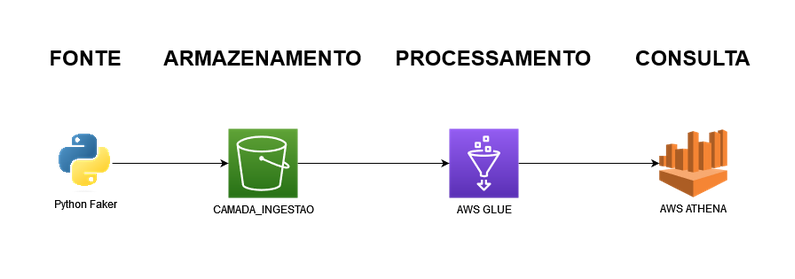

# 0.0 - Imports

In [4]:
import pandas as pd
import random
from faker import Faker

# 1.0 - Gerando Dados

In [14]:
fake = Faker('pt_BR')

In [40]:
def generate_client_data(num_clients):
    clients = []
    for _ in range(num_clients):
        client = {
            "ID": fake.random_int(min=12345, max=99999),
            "nome": fake.name(),
            "ano_de_nascimento": fake.random_int(1950, 2023),
            "renda_mensal": fake.random_int(min=2000, max=100000),
            "estado_civil": fake.random_choices(elements=("solteiro", "casado", "divorciado", "viuvo")),
            "quantidade_de_filhos": fake.random_int(min=0, max=4),
            "qtd_fish_product": fake.random_int(min=0, max=100),
            "qtd_meat_products": fake.random_int(min=0, max=100),
            "qtd_sweets_products": random.randint(0, 100),
            "accept_camp_1": fake.random_int(0, 1),
            "accept_camp_2": fake.random_int(0, 1),
            "accept_camp_3": fake.random_int(0, 1),
            "dt_customer": fake.date_between(start_date="-5y", end_date="today"),
            "qtd_purchase": fake.random_int(0, 5000),
            "recency": fake.random_int(0, 180),
        }
        clients.append(client)
    return pd.DataFrame(clients)

num_clients = 100
client_df = generate_client_data(num_clients)
client_df.head()


,ID,nome,ano_de_nascimento,renda_mensal,estado_civil,quantidade_de_filhos,qtd_fish_product,qtd_meat_products,qtd_sweets_products,accept_camp_1,accept_camp_2,accept_camp_3,dt_customer,qtd_purchase,recency
0,71717,Fernando Cunha,2016,87299,"[solteiro, solteiro, viuvo]",0,5,26,28,1,1,1,2023-04-28,344,179
1,91983,Luna Ramos,2005,50817,"[solteiro, divorciado]",0,17,19,81,1,1,1,2021-08-13,767,86
2,93680,Augusto Fogaça,1970,21584,"[casado, viuvo, solteiro]",0,61,93,92,0,0,1,2020-01-08,4284,18
3,52016,Helena Jesus,2003,16241,[viuvo],3,43,43,84,0,1,0,2022-09-23,3494,9
4,51916,Sr. Davi Luiz Nascimento,1961,10629,[casado],1,7,49,22,0,0,1,2023-03-24,4251,74


In [42]:
client_df.to_csv('clients.csv')